In [69]:
import pandas as pd
df = pd.read_csv('<downloaded-csv-file-path')
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        0  ...       22       22       24       24   
1        0        0        0  ...       59       64       70       76   
2        0        0        0  ...       74       87       90      139   
3        0        0        0  ...       39       53       75       88   
4        0        0        0  ...        0        0        1        2   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  
0       40       40       74       84       94      110  
1       89      104      123      146      174      186  
2      201      230      264      302      367      409  
3      113      133      164      188      224      267  
4        2        3        3        3        4        4  

[5 rows x 70 columns]

Filter the Country from DataFrame

In [70]:
df = df.loc[df['Country/Region'] == 'India']
df.head()

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
131            NaN          India  21.0  78.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  3/18/20  3/19/20  3/20/20  3/21/20  \
131        0        0        0  ...      156      194      244      330   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  
131      396      499      536      657      727      887  

[1 rows x 70 columns]

Transpose to have the below format
Date - Xaxis  - 1st column
Cases - Yaxis - 2nd column
This is for simplicity as vertical table is easier than horizontal

In [71]:
df = df.transpose()
df.head()

131
Province/State    NaN
Country/Region  India
Lat                21
Long               78
1/22/20             0

Drop unwanted Rows like Lat, Long, etc

In [72]:
df = df.drop("Lat")
df = df.drop("Long")
df = df.drop("Province/State")
df = df.drop("Country/Region")
df.head()

131
1/22/20   0
1/23/20   0
1/24/20   0
1/25/20   0
1/26/20   0

Rename first column to Date. Add a new column for serial number. Rename column to Cases

In [73]:
df.index.name = 'Date'
df = df.reset_index()
df.columns = ['Date', 'Cases']
df.tail(10)

Date Cases
56  3/18/20   156
57  3/19/20   194
58  3/20/20   244
59  3/21/20   330
60  3/22/20   396
61  3/23/20   499
62  3/24/20   536
63  3/25/20   657
64  3/26/20   727
65  3/27/20   887

Define a regression function for exponential behavior of data.
Below function is used because it fits the current data with less disparity, however to achieve further accuracy, this can/ should be changed

In [74]:
import numpy as np

def func_exp(x, c0, c1):
    """Return values from a general exponential function."""
    return c0*np.exp(c1 * x)

Another function tried -->
def func_exp(t, c0, c1, c2, c3):
    return c0 + c1*t - c2*np.exp(-c3*t)
####### but it was not accurate compared to above

Plot the function.
Guess array provides values to regression function to plot the graph initially. This will not match the original curve.

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

guess = [1, 0.1]

n = len(df['Date']) # Total number of cases - X axis
regression_arr = np.empty(n) # Create empty array as container for Y-axis to fill values obtained by solving reg func
for i in range(n):
    regression_arr[i] = func_exp(i, guess[0], guess[1])

# Resize the graph
plt.figure(figsize=(15,7))
#Ticks on X-axis are for every alternate day on X axis. Rotate the xTick label by 45 deg
plt.xticks(np.arange(0, len(df['Date']), 2.0), rotation=45)
# Plot the curve with original data - in Blue color
plt.plot(df['Date'],df['Cases'])
# Plot the curve with regression data - Red dots
plt.plot(df['Date'],regression_arr, 'r.')

Fit the regression data with original curve

In [80]:
from scipy.optimize import curve_fit
cases_arr = df['Cases'].values
c,cov = curve_fit(func_exp, np.arange(0, len(df), 1), cases_arr, guess)
# Print the co-efficients obtained in array 'c'
print(c)

[0.01184053 0.17283083]


Run the regression function again with co-efficients obtained above. Create an array as container for Y-axis values.

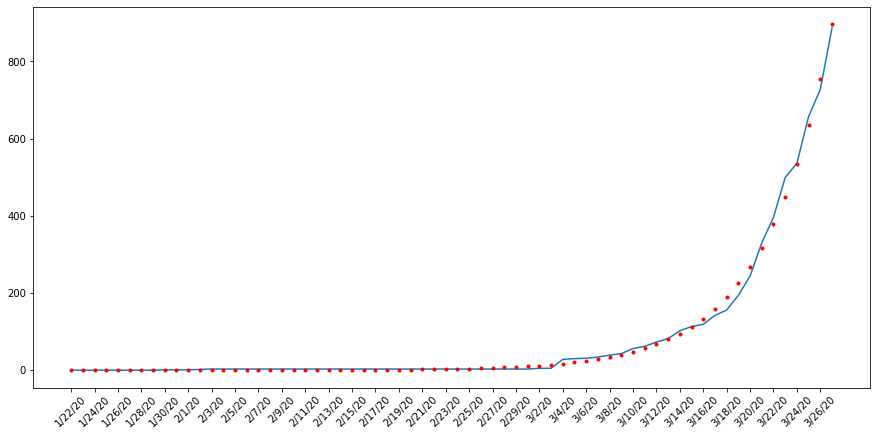

In [81]:
for i in range(n):
    regression_arr[i] = func_exp(i, c[0], c[1])

# Resize the graph
plt.figure(figsize=(15,7))
#Ticks on X-axis are for every alternate day on X axis. Rotate the xTick label by 45 deg
plt.xticks(np.arange(0, len(df['Date']), 2.0), rotation=45)
# Plot the curve with original data - in Blue color
plt.plot(df['Date'],df['Cases'])
# Plot the curve with regression data - Red dots
plt.plot(df['Date'],regression_arr, 'r.')

Find the error margin from cost/ regression function

In [78]:
from sklearn.metrics import r2_score
print('R^2: ',r2_score(regression_arr, cases_arr))

R^2:  0.9963142388360697


Calculate the number of cases for 28th March, 2020

In [82]:
# 28th March - 67th day (67-1), 1st day (22nd Jan) starts from 0 index
print(func_exp(len(df), c[0], c[1]))

1064.8694623872607
